# Project 1, Part 6, Best Recommendation

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: PRAKASH KRISHNAN

Year: 2021-2022

Semester: SPRING 2022

Section: WBL 011


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

# Connect to the Postgres database¶
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# Create a cursor for the connection
cursor = connection.cursor()


# Format float displays in a dataframe
pd.options.display.float_format = '$ {:,.2f}'.format

# Create a one time SQL View between stores and sales table for querries in this notebook

connection.rollback()

query = """

drop view if exists v_join_s_sa;

create view v_join_s_sa
as
select s.store_id,
       s.street as store_street,
       s.city as store_city,
       s.state as store_state,
       s.zip as store_zip,
       s.latitude as store_latitude,
       s.longitude as store_longitude,
       sa.sale_id,
       sa.customer_id,
       sa.sale_date,
       extract(dow from sa.sale_date) as dow,
       to_char(sa.sale_date, 'Day') as day_of_week,
       extract(month from sa.sale_date) as month_number,
       to_char(sa.sale_date, 'Month') as month_name,
       sa.total_amount
from stores s
     join sales as sa
        on s.store_id = sa.store_id
;

"""

cursor.execute(query)

connection.commit()

## The executives would like your best recommendation for the business. 

## Create an executive summary giving and explaining your best recommendation for the business. 

## You must support your summary with data, in the form of output of queries, data visualization, etc. There is a 1 query minimum.

# Executive Summary

In reviewing the data and performing analytics on sales, customers and product offering, there are areas of strength for AGM and areas of opportunities for continued growth. This executive summary provides recommendation for AGM Management.

**Areas of Strength-**
1. AGM has a thriving business with $98.8M of annual sales, 1.5M sales transactions with 5 store locations and just 8 meal offerings.
2. AGM has 31k customers in and around the 5 store locations.
3. Over 8.2M meals were purchased in 2020

**Areas of Opportunities-**
1. As purchase behavior moves from in-store shopping to on-line/web-based, AGM would be well served to consider building infrastructure for a on-line store presence so customers can buy meals over the web and either have curb-side pickup or shipping. The benefit of this approach would be attract customers who do not live close to a store location and yet are interested in shopping at AGM.
2. Investing in an infrastrucure for on-line presence would also provide the opportunity for AGM to get customer profile information on preferences, buying habits so it can tailor future offerings.
3. Customized meals targetting different customer groups and also around holiday periods, may provide incentives for customer to increase their shopping during holiday periods. As an example, offering specific meals for Thanksgiving.
4. Differential pricing for the meals, bundled pricing for combinations of meals and time based promotions can be offered to keep the customer interest throughout the year.
5. Market expansion to high population cities such as New York or Los Angeles, can be considered for future expansions.

**Recommendation-**

*Short-Term:*
In the short-term, leverage data and analytics to thoroughly know your customer is important. Developing and operationalizing a balanced score card to measure "best customer analytics" will yield short term benefits my fine tuning marketing programs to sales growth.

*Balanced Score Card can include:* <br>
**Monetary Value** - Highest dollar sales that the customer has generated in a period (typically a year) <br>
**Frequency** - Frequency of customer purchases <br>
**Recency** - Measure of near-term purchases <br>
**Breadth of Sales** - Measure of different products being purchased <br>
**First Time Customers** - Ability to attract new customers <br>

The score card can reviewed on a quarterly basis for learnings, best practices and adjusting the marketing programs (pricing, meal types, promotions etc.). The score card can be reviewed nationally or regionally as appropriate.

**An example of a score-card is provided in the visualization section below.**

*Long-Term:*
A long term strategic plan can be developed to address the suggestions in the opportunity area and must be proritized for Return on Investments and also associated risks involved. Long term strategic plan, involve, people, time and resources and must be carefully analyzed and executed upon.


In [3]:
# Query to determine top 5 customers with highest annual $ sales

rollback_before_flag = True
rollback_after_flag = True

query = """

select customers.customer_id, customers.first_name, customers.last_name, customers.state, 
customers.city, sum(sales.total_amount) as annual_sales

from customers
    join sales
        on customers.customer_id = sales.customer_id

group by customers.customer_id, customers.last_name, customers.first_name
order by annual_sales desc, customers.last_name, customers.first_name

limit 5

"""
df1a=my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

In [4]:
# Query to determine bottom 5 customers with lowest annual $ sales

rollback_before_flag = True
rollback_after_flag = True

query = """

select customers.customer_id, customers.first_name, customers.last_name, customers.state, 
customers.city, sum(sales.total_amount) as annual_sales

from customers
    join sales
        on customers.customer_id = sales.customer_id

group by customers.customer_id, customers.last_name, customers.first_name
order by annual_sales asc, customers.last_name, customers.first_name

limit 5

"""
df1b=my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

In [10]:
# Query to determine top 5 customers with highest sales transactions

rollback_before_flag = True
rollback_after_flag = True

query = """

select customers.customer_id, customers.first_name, customers.last_name, customers.state, 
customers.city, count(sales.sale_id) as numb_sales_transactions

from customers
    join sales
        on customers.customer_id = sales.customer_id

group by customers.customer_id, customers.last_name,customers.first_name
order by numb_sales_transactions desc, customers.last_name, customers.first_name

limit 5
"""
df2a=my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

In [6]:
# Query to determine bottom 5 customers with lowest sales transactions

rollback_before_flag = True
rollback_after_flag = True

query = """

select customers.customer_id, customers.first_name, customers.last_name, customers.state, 
customers.city, count(sales.sale_id) as numb_sales_transactions

from customers
    join sales
        on customers.customer_id = sales.customer_id

group by customers.customer_id, customers.last_name,customers.first_name
order by numb_sales_transactions asc, customers.last_name, customers.first_name

limit 5
"""
df2b=my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

In [7]:
# Query to determine top 5 customers with most complementary meals

rollback_before_flag = True
rollback_after_flag = True

query = """


select temp_tbl.customer_id, temp_tbl.last_name, temp_tbl.first_name, temp_tbl.city,temp_tbl.state,
count(*) as meal_count from

(select distinct customers.customer_id, customers.first_name, customers.last_name, customers.city, customers.state, 
products.description

from customers

join sales
on customers.customer_id=sales.sale_id

join line_items
on sales.store_id = line_items.store_id and sales.sale_id = line_items.sale_id

join products
on line_items.product_id = products.product_id) as temp_tbl

group by customer_id, temp_tbl.last_name, temp_tbl.first_name, temp_tbl.city, temp_tbl.state
order by meal_count desc, temp_tbl.last_name, temp_tbl.first_name

limit 5


"""
df3a=my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

In [8]:
# Query to determine bottom 5 customers with least complementary meals

rollback_before_flag = True
rollback_after_flag = True

query = """


select temp_tbl.customer_id, temp_tbl.last_name, temp_tbl.first_name, temp_tbl.city,temp_tbl.state,
count(*) as meal_count from

(select distinct customers.customer_id, customers.first_name, customers.last_name, customers.city, customers.state, 
products.description

from customers

join sales
on customers.customer_id=sales.sale_id

join line_items
on sales.store_id = line_items.store_id and sales.sale_id = line_items.sale_id

join products
on line_items.product_id = products.product_id) as temp_tbl

group by customer_id, temp_tbl.last_name, temp_tbl.first_name, temp_tbl.city, temp_tbl.state
order by meal_count asc, temp_tbl.last_name, temp_tbl.first_name

limit 5


"""
df3b=my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

## EXAMPLE: Data Visualization of Balanced Score Card Method

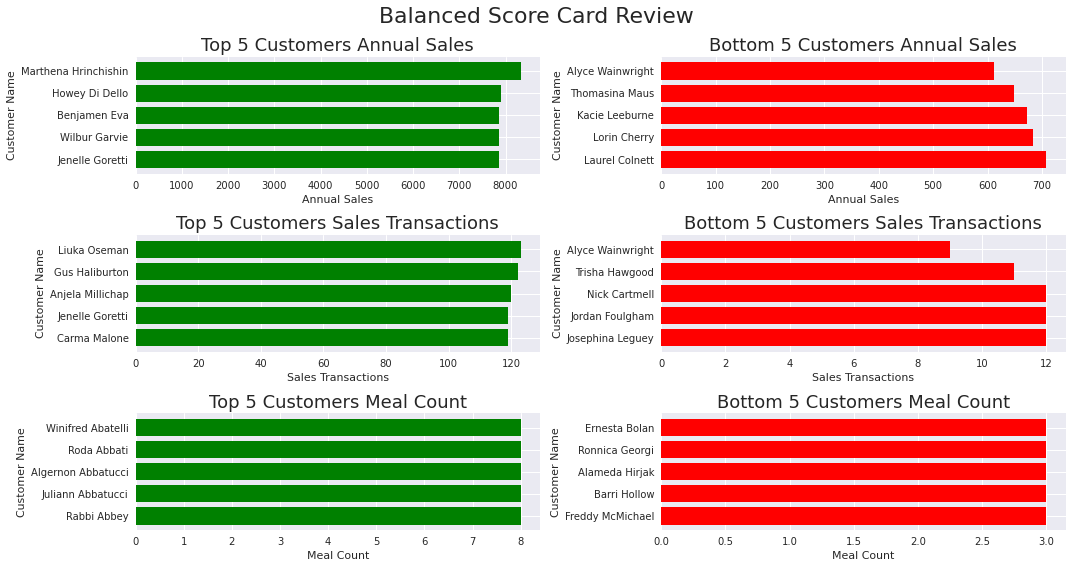

In [9]:
plt.style.use('seaborn')

sales1a = df1a['annual_sales']
customer1a = df1a['first_name']+" "+df1a['last_name']

sales1b = df1b['annual_sales']
customer1b = df1b['first_name']+" "+df1b['last_name']

numb_of_transactions2a = df2a['numb_sales_transactions']
customer2a = df2a['first_name']+" "+df2a['last_name']

numb_of_transactions2b = df2b['numb_sales_transactions']
customer2b = df2b['first_name']+" "+df2b['last_name']

annual_meal_count3a = df3a['meal_count']
customer3a = df3a['first_name']+" "+df3a['last_name']

annual_meal_count3b = df3b['meal_count']
customer3b = df3b['first_name']+" "+df3b['last_name']


fig,ax = plt.subplots(3,2,figsize=(15,8))

fig.suptitle('Balanced Score Card Review', fontsize=22)

ax[0][0].barh(customer1a, sales1a, label='highest $ sales',color='green')
ax[0][0].set_title("Top 5 Customers Annual Sales", fontsize=18)
ax[0][0].set_ylabel('Customer Name')
ax[0][0].set_xlabel('Annual Sales')
ax[0][0].invert_yaxis()

ax[0][1].barh(customer1b, sales1b, label='lowest $ sales',color='red')
ax[0][1].set_title("Bottom 5 Customers Annual Sales", fontsize=18)
ax[0][1].set_ylabel('Customer Name')
ax[0][1].set_xlabel('Annual Sales')
ax[0][1].invert_yaxis()

ax[1][0].barh(customer2a, numb_of_transactions2a, label='highest # of transactions',color='green')
ax[1][0].set_title("Top 5 Customers Sales Transactions", fontsize=18)
ax[1][0].set_ylabel('Customer Name')
ax[1][0].set_xlabel('Sales Transactions')
ax[1][0].invert_yaxis()

ax[1][1].barh(customer2b, numb_of_transactions2b, label='lowest # of transactions',color='red')
ax[1][1].set_title("Bottom 5 Customers Sales Transactions", fontsize=18)
ax[1][1].set_ylabel('Customer Name')
ax[1][1].set_xlabel('Sales Transactions')
ax[1][1].invert_yaxis()

ax[2][0].barh(customer3a, annual_meal_count3a, label='highest meal counr',color='green')
ax[2][0].set_title("Top 5 Customers Meal Count", fontsize=18)
ax[2][0].set_ylabel('Customer Name')
ax[2][0].set_xlabel('Meal Count')
ax[2][0].invert_yaxis()

ax[2][1].barh(customer3b, annual_meal_count3b, label='lowest meal counr',color='red')
ax[2][1].set_title("Bottom 5 Customers Meal Count", fontsize=18)
ax[2][1].set_ylabel('Customer Name')
ax[2][1].set_xlabel('Meal Count')
ax[2][1].invert_yaxis()


plt.tight_layout()
plt.show()
